# Name : امین حجاری


### imports libs

In [23]:
# import libs we need
# NOTE: used python 3.9.17

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

# read datasets 

#### Before working and viewing the data, due to the messy and irregular nature of the data, we first sorted and cleaned the data by Excel and saved the new data sets.
The following link will help you to understand the process of cleaning the dataset

https://help.askcody.com/how-to-correctly-open-exported-csv-files-in-excel

https://www.wikihow.com/Add-Autonumber-in-Excel

https://youtu.be/46pC9p3oF0M?si=4DMmubCA_eR8pYnb

# DF1

In [24]:
df1 = pd.read_csv('newDatasets_1.csv')
df1

,ID,feature1,feature2,Labels
0,1,-5.97,-0.60,0
1,2,-5.68,3.30,0
2,3,1.00,-12.26,2
3,4,-7.16,0.11,0
4,5,1.21,-10.86,2
...,...,...,...,...
995,996,-7.15,6.17,0
996,997,-2.55,-4.33,1
997,998,-6.16,-1.31,0
998,999,1.58,-10.08,2


In [25]:
df1.head(5)

,ID,feature1,feature2,Labels
0,1,-5.97,-0.60,0
1,2,-5.68,3.30,0
2,3,1.00,-12.26,2
3,4,-7.16,0.11,0
4,5,1.21,-10.86,2


In [26]:
print(df1.info)

<bound method DataFrame.info of        ID  feature1  feature2  Labels
0       1     -5.97     -0.60       0
1       2     -5.68      3.30       0
2       3      1.00    -12.26       2
3       4     -7.16      0.11       0
4       5      1.21    -10.86       2
..    ...       ...       ...     ...
995   996     -7.15      6.17       0
996   997     -2.55     -4.33       1
997   998     -6.16     -1.31       0
998   999      1.58    -10.08       2
999  1000     -8.59      3.48       0

[1000 rows x 4 columns]>


In [27]:
print(df1.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [28]:
y_df1 = df1['Labels'].values
y_df1

array([0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0,
       1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2,
       2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 1,
       2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 0,
       2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0,
       1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2,
       0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2,

In [29]:
X_df1 = df1[['feature1', 'feature2']].values
X_df1

array([[ -5.97,  -0.6 ],
       [ -5.68,   3.3 ],
       [  1.  , -12.26],
       ...,
       [ -6.16,  -1.31],
       [  1.58, -10.08],
       [ -8.59,   3.48]])

In [30]:

from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB


# Define number of folds (k)
k = 5

# Initialize k-fold cross-validation
kf = KFold(n_splits=k)

# Initialize lists to store error variances
train_error_variances = []
test_error_variances = []

# Perform k-fold cross-validation
for train_index_df1, test_index_df1 in kf.split(X_df1):
    X_train_df1, X_test_df1 = X_df1[train_index_df1], X_df1[test_index_df1]
    y_train_df1, y_test_df1 = y_df1[train_index_df1], y_df1[test_index_df1]

    # Fit Gaussian Naive Bayes model
    model = GaussianNB()
    model.fit(X_train_df1, y_train_df1)

    # Predictions
    y_train_pred_df1 = model.predict(X_train_df1)
    y_test_pred_df1 = model.predict(X_test_df1)

    # Error calculation for training and testing
    train_error_var_df1 = np.var(y_train_pred_df1 != y_train_df1)
    test_error_var_df1 = np.var(y_test_pred_df1 != y_test_df1)

    # Append to error lists
    train_error_variances.append(train_error_var_df1)
    test_error_variances.append(test_error_var_df1)

# Calculate average error variances
avg_train_error_variance = np.mean(train_error_variances)
avg_test_error_variance = np.mean(test_error_variances)

print("Average Training Error Variance:", avg_train_error_variance)
print("Average Testing Error Variance:", avg_test_error_variance)


Average Training Error Variance: 0.0
Average Testing Error Variance: 0.0


In [31]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# Initialize k-fold cross-validation
k = 5
k_fold = KFold(n_splits=k)

# Initialize lists to store results
train_mean_list = []
train_var_list = []
test_mean_list = []
test_var_list = []

# Perform k-fold cross-validation
for train_indices, test_indices in k_fold.split(X_df1):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_df1[train_indices], X_df1[test_indices]
    y_train_fold, y_val_fold = y_df1[train_indices], y_df1[test_indices]
    
    # Train Gaussian Naive Bayes classifier
    model = GaussianNB()
    model.fit(X_train_fold, y_train_fold)
    
    # Calculate mean and variance of training data
    train_mean = np.mean(model.predict(X_train_fold) == y_train_fold)
    train_var = np.var(model.predict(X_train_fold) == y_train_fold)
    train_mean_list.append(train_mean)
    train_var_list.append(train_var)
    
    # Calculate mean and variance of test data
    test_mean = np.mean(model.predict(X_val_fold) == y_val_fold)
    test_var = np.var(model.predict(X_val_fold) == y_val_fold)
    test_mean_list.append(test_mean)
    test_var_list.append(test_var)

# Calculate mean and variance of mean and error variance
train_mean_mean = np.mean(train_mean_list)
train_mean_var = np.var(train_mean_list)
train_var_mean = np.mean(train_var_list)
train_var_var = np.var(train_var_list)

test_mean_mean = np.mean(test_mean_list)
test_mean_var = np.var(test_mean_list)
test_var_mean = np.mean(test_var_list)
test_var_var = np.var(test_var_list)

print("Mean and Variance of Training Mean Accuracy:", train_mean_mean, train_mean_var)
print("Mean and Variance of Training Error Variance:", train_var_mean, train_var_var)
print("Mean and Variance of Test Mean Accuracy:", test_mean_mean, test_mean_var)
print("Mean and Variance of Test Error Variance:", test_var_mean, test_var_var)


Mean and Variance of Training Mean Accuracy: 1.0 0.0
Mean and Variance of Training Error Variance: 0.0 0.0
Mean and Variance of Test Mean Accuracy: 1.0 0.0
Mean and Variance of Test Error Variance: 0.0 0.0


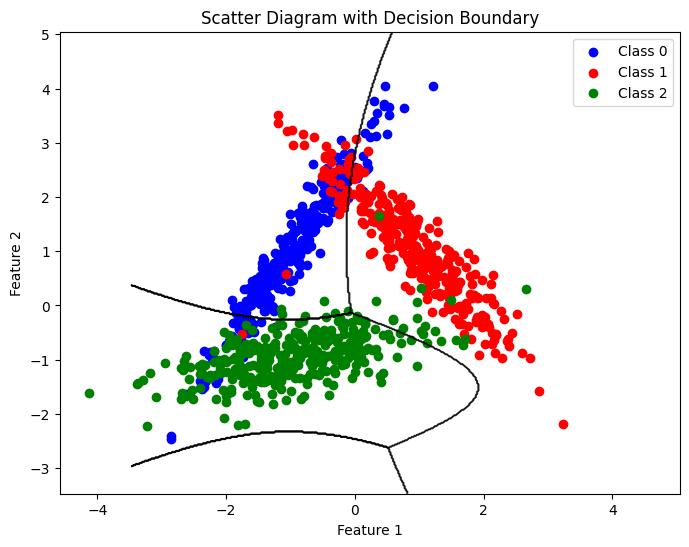

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

# Generate synthetic data for demonstration
X_df1, y_df1 = make_classification(n_samples=1000, n_features=2, n_classes=3, 
                           n_clusters_per_class=1, random_state=42,
                           n_informative=2, n_redundant=0, n_repeated=0)

# Train Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_df1, y_df1)

# Plot scatter diagram of the data
plt.figure(figsize=(8, 6))

# Scatter plot of class 0
plt.scatter(X_df1[y_df1 == 0][:, 0], X_df1[y_df1 == 0][:, 1], color='blue', label='Class 0')

# Scatter plot of class 1
plt.scatter(X_df1[y_df1 == 1][:, 0], X_df1[y_df1 == 1][:, 1], color='red', label='Class 1')

# Scatter plot of class 2
plt.scatter(X_df1[y_df1 == 2][:, 0], X_df1[y_df1 == 2][:, 1], color='green', label='Class 2')

# Define meshgrid for decision boundary
x_min, x_max = X_df1[:, 1].min() - 1, X_df1[:, 1].max() + 1
y_min, y_max = X_df1[:, 1].min() - 1, X_df1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict labels for each point in meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.5)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Diagram with Decision Boundary')
plt.legend()
plt.show()


# KNN

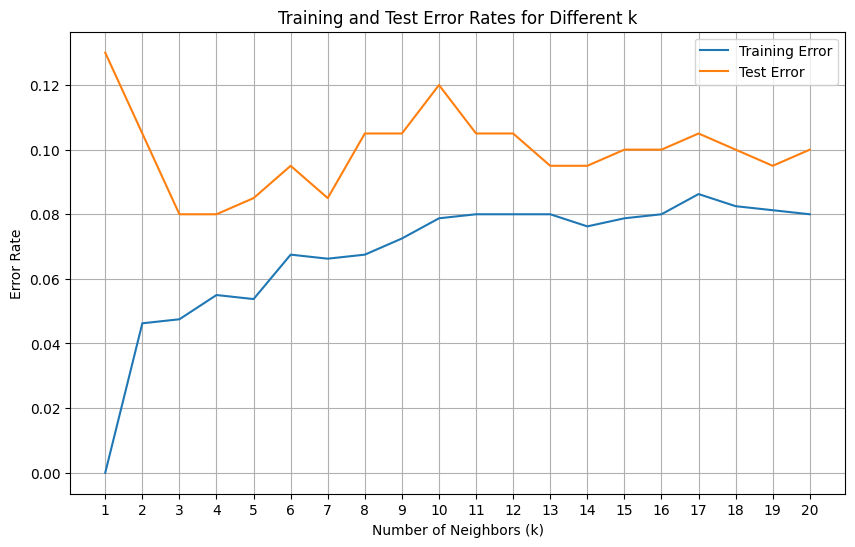

Optimal Number of Neighbors (k): 3
Test Accuracy with Optimal k: 0.92


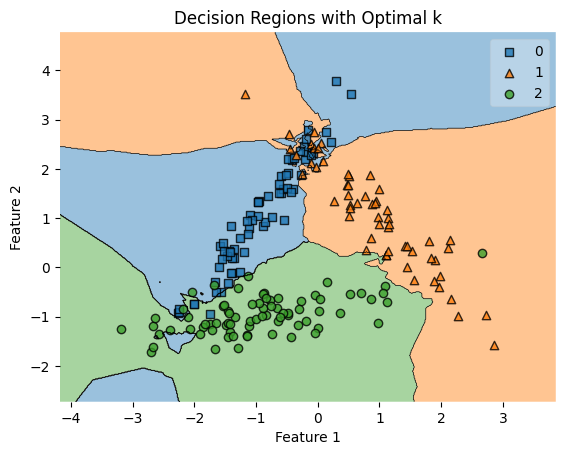

In [33]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Generate synthetic dataset with 1000 samples and 3 features
X, y = make_classification(n_samples=1000, n_features=3, n_classes=3, 
                           n_clusters_per_class=1, random_state=42,
                           n_informative=2, n_redundant=0, n_repeated=0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df1, y_df1, test_size=0.2, random_state=42)

# Choose a range of k values
k_values = range(1, 21)  # Example: Evaluate k from 1 to 20

# Train and evaluate the model for each k
train_errors = []
test_errors = []

for k in k_values:
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions on training and test sets
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    # Calculate errors
    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    
    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the error diagram
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error')
plt.plot(k_values, test_errors, label='Test Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Training and Test Error Rates for Different k')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Determine the optimal k
optimal_k = k_values[np.argmin(test_errors)]
print("Optimal Number of Neighbors (k):", optimal_k)

# Train the model with the optimal k
optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn.fit(X_train, y_train)

# Report the test accuracy
test_accuracy = optimal_knn.score(X_test, y_test)
print("Test Accuracy with Optimal k:", test_accuracy)

# Plot decision regions
plot_decision_regions(X_test, y_test, clf=optimal_knn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions with Optimal k')
plt.show()


# if K = 1

Test Accuracy with k=1: 0.87


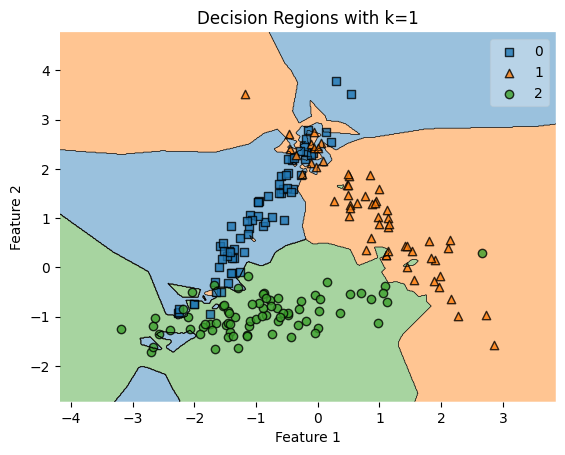

In [35]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Generate synthetic dataset with 1000 samples and 3 features
X, y = make_classification(n_samples=1000, n_features=2, n_classes=3, 
                           n_clusters_per_class=1, random_state=42,
                           n_informative=2, n_redundant=0, n_repeated=0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df1, y_df1, test_size=0.2, random_state=42)

# Train the model with k=1
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)

# Report the test accuracy for k=1
test_accuracy_1 = knn_1.score(X_test, y_test)
print("Test Accuracy with k=1:", test_accuracy_1)

# Plot decision regions for k=1
plot_decision_regions(X_test, y_test, clf=knn_1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions with k=1')
plt.show()


# DF2

In [2]:
df2 = pd.read_csv('newDatasets_2.csv')
df2

,ID,feature1,feature2,labels
0,1,8.78,4.99,3
1,2,10.13,-1.56,2
2,3,10.04,6.45,2
3,4,3.71,15.65,4
4,5,2.40,2.99,1
...,...,...,...,...
9995,9996,-0.24,-0.44,0
9996,9997,9.61,3.87,2
9997,9998,0.00,0.00,0
9998,9999,1.86,6.72,1


In [3]:
print(df2.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [4]:
print(df2.info)

<bound method DataFrame.info of          ID  feature1  feature2  labels
0         1      8.78      4.99       3
1         2     10.13     -1.56       2
2         3     10.04      6.45       2
3         4      3.71     15.65       4
4         5      2.40      2.99       1
...     ...       ...       ...     ...
9995   9996     -0.24     -0.44       0
9996   9997      9.61      3.87       2
9997   9998      0.00      0.00       0
9998   9999      1.86      6.72       1
9999  10000      0.00      0.00       0

[10000 rows x 4 columns]>


In [5]:
df2.tail(5)

,ID,feature1,feature2,labels
9995,9996,-0.24,-0.44,0
9996,9997,9.61,3.87,2
9997,9998,0.00,0.00,0
9998,9999,1.86,6.72,1
9999,10000,0.00,0.00,0


In [6]:
y_df2 = df2['labels'].values
y_df2


array([3, 2, 2, ..., 0, 1, 0], dtype=int64)

In [7]:
x_df2 = df2[['feature1', 'feature2']].values
x_df2

array([[ 8.78,  4.99],
       [10.13, -1.56],
       [10.04,  6.45],
       ...,
       [ 0.  ,  0.  ],
       [ 1.86,  6.72],
       [ 0.  ,  0.  ]])

# K-Fold

In [8]:

from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB


# Define number of folds (k)
k = 5

# Initialize k-fold cross-validation
kf = KFold(n_splits=k)

# Initialize lists to store error variances
train_error_variances = []
test_error_variances = []

# Perform k-fold cross-validation
for train_index_df2, test_index_df2 in kf.split(x_df2):
    X_train_df2, X_test_df2 = x_df2[train_index_df2], x_df2[test_index_df2]
    y_train_df2, y_test_df2 = y_df2[train_index_df2], y_df2[test_index_df2]

    # Fit Gaussian Naive Bayes model
    model = GaussianNB()
    model.fit(X_train_df2, y_train_df2)

    # Predictions
    y_train_pred_df2 = model.predict(X_train_df2)
    y_test_pred_df2 = model.predict(X_test_df2)

    # Error calculation for training and testing
    train_error_var = np.var(y_train_pred_df2 != y_train_df2)
    test_error_var = np.var(y_test_pred_df2 != y_test_df2)

    # Append to error lists
    train_error_variances.append(train_error_var)
    test_error_variances.append(test_error_var)

# Calculate average error variances
avg_train_error_variance = np.mean(train_error_variances)
avg_test_error_variance = np.mean(test_error_variances)

print("Average Training Error Variance:", avg_train_error_variance)
print("Average Testing Error Variance:", avg_test_error_variance)


Average Training Error Variance: 0.017361371874999997
Average Testing Error Variance: 0.01718045


In [9]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB



# Initialize k-fold cross-validation
k = 5
k_fold = KFold(n_splits=k)

# Initialize lists to store results
train_mean_list = []
train_var_list = []
test_mean_list = []
test_var_list = []

# Perform k-fold cross-validation
for train_indices, test_indices in k_fold.split(x_df2):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = x_df2[train_indices], x_df2[test_indices]
    y_train_fold, y_val_fold = y_df2[train_indices], y_df2[test_indices]
    
    # Train Gaussian Naive Bayes classifier
    model = GaussianNB()
    model.fit(X_train_fold, y_train_fold)
    
    # Calculate mean and variance of training data
    train_mean = np.mean(model.predict(X_train_fold) == y_train_fold)
    train_var = np.var(model.predict(X_train_fold) == y_train_fold)
    train_mean_list.append(train_mean)
    train_var_list.append(train_var)
    
    # Calculate mean and variance of test data
    test_mean = np.mean(model.predict(X_val_fold) == y_val_fold)
    test_var = np.var(model.predict(X_val_fold) == y_val_fold)
    test_mean_list.append(test_mean)
    test_var_list.append(test_var)

# Calculate mean and variance of mean and error variance
train_mean_mean = np.mean(train_mean_list)
train_mean_var = np.var(train_mean_list)
train_var_mean = np.mean(train_var_list)
train_var_var = np.var(train_var_list)

test_mean_mean = np.mean(test_mean_list)
test_mean_var = np.var(test_mean_list)
test_var_mean = np.mean(test_var_list)
test_var_var = np.var(test_var_list)

print("Mean and Variance of Training Mean Accuracy:", train_mean_mean, train_mean_var)
print("Mean and Variance of Training Error Variance:", train_var_mean, train_var_var)
print("Mean and Variance of Test Mean Accuracy:", test_mean_mean, test_mean_var)
print("Mean and Variance of Test Error Variance:", test_var_mean, test_var_var)


Mean and Variance of Training Mean Accuracy: 0.982325 1.2225000000000162e-06
Mean and Variance of Training Error Variance: 0.017361371874999997 1.1382723383203157e-06
Mean and Variance of Test Mean Accuracy: 0.9825000000000002 1.3299999999999934e-05
Mean and Variance of Test Error Variance: 0.017180449999999996 1.234725923500002e-05


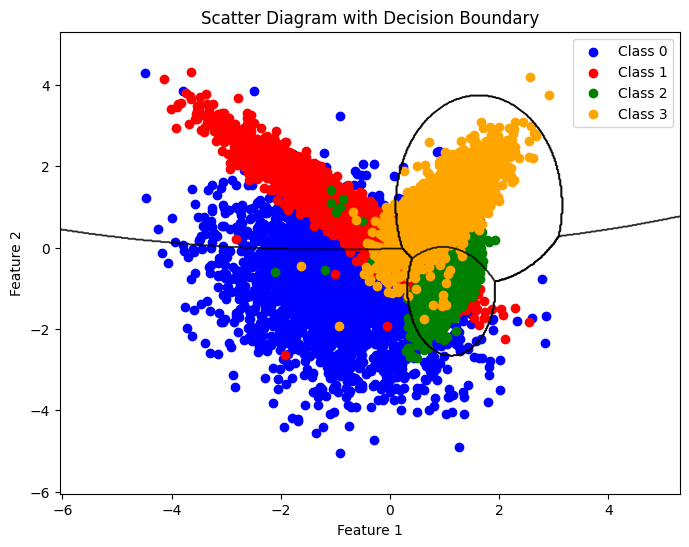

In [10]:

from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

# Generate synthetic data for demonstration
x_df2, y_df2 = make_classification(n_samples=10000, n_features=2, n_classes=4, 
                           n_clusters_per_class=1, random_state=42,
                           n_informative=2, n_redundant=0, n_repeated=0)

# Train Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(x_df2, y_df2)

# Plot scatter diagram of the data
plt.figure(figsize=(8, 6))

# Scatter plot of class 0
plt.scatter(x_df2[y_df2 == 0][:, 0], x_df2[y_df2 == 0][:, 1], color='blue', label='Class 0')

# Scatter plot of class 1
plt.scatter(x_df2[y_df2 == 1][:, 0], x_df2[y_df2 == 1][:, 1], color='red', label='Class 1')

# # Scatter plot of class 2
plt.scatter(x_df2[y_df2 == 2][:, 0], x_df2[y_df2 == 2][:, 1], color='green', label='Class 2')

# Scatter plot of class 3
plt.scatter(x_df2[y_df2 == 3][:, 0], x_df2[y_df2 == 3][:, 1], color='orange', label='Class 3')

# Define meshgrid for decision boundary
x_min, x_max = x_df2[:, 1].min() - 1, x_df2[:, 1].max() + 1
y_min, y_max = x_df2[:, 1].min() - 1, x_df2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict labels for each point in meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.5)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Diagram with Decision Boundary')
plt.legend()
plt.show()


# KNN

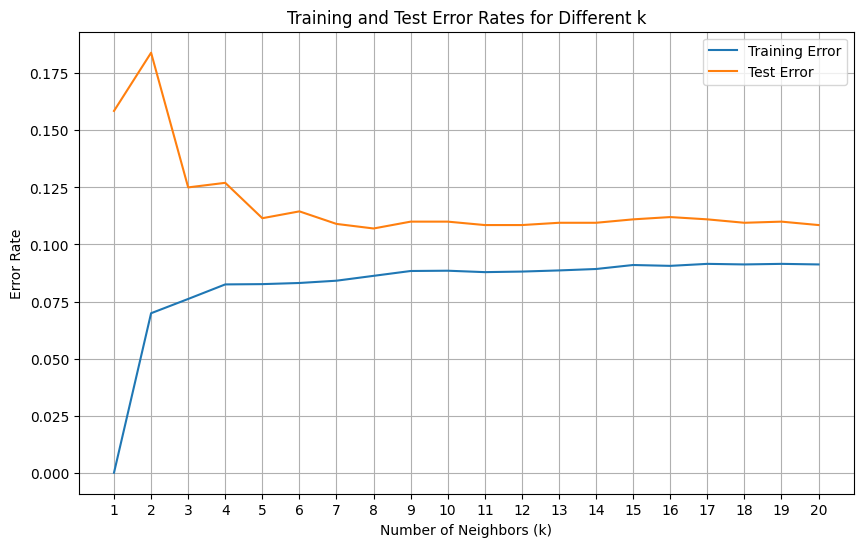

Optimal Number of Neighbors (k): 8
Test Accuracy with Optimal k: 0.893


c:\Users\RPH\anaconda3\envs\fullpack\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


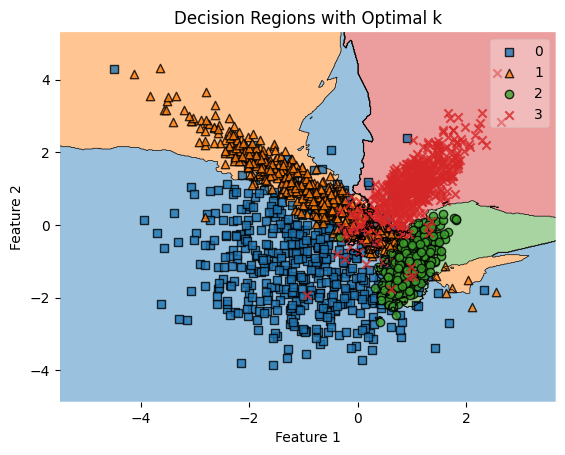

In [11]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Generate synthetic dataset with 1000 samples and 2 features
X, y = make_classification(n_samples=10000, n_features=2, n_classes=4, 
                           n_clusters_per_class=1, random_state=42,
                           n_informative=2, n_redundant=0, n_repeated=0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_df2, y_df2, test_size=0.2, random_state=42)

# Choose a range of k values
k_values = range(1, 21)  # Example: Evaluate k from 1 to 20

# Train and evaluate the model for each k
train_errors = []
test_errors = []

for k in k_values:
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions on training and test sets
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    # Calculate errors
    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    
    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the error diagram
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error')
plt.plot(k_values, test_errors, label='Test Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Training and Test Error Rates for Different k')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Determine the optimal k
optimal_k = k_values[np.argmin(test_errors)]
print("Optimal Number of Neighbors (k):", optimal_k)

# Train the model with the optimal k
optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn.fit(X_train, y_train)

# Report the test accuracy
test_accuracy = optimal_knn.score(X_test, y_test)
print("Test Accuracy with Optimal k:", test_accuracy)

# Plot decision regions
plot_decision_regions(X_test, y_test, clf=optimal_knn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions with Optimal k')
plt.show()


# k=1

Test Accuracy with k=1: 0.8415


c:\Users\RPH\anaconda3\envs\fullpack\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


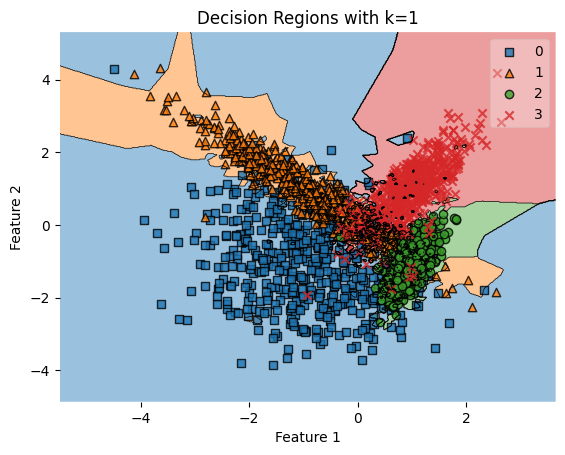

In [36]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Generate synthetic dataset with 1000 samples and 2 features
X, y = make_classification(n_samples=10000, n_features=2, n_classes=4, 
                           n_clusters_per_class=1, random_state=42,
                           n_informative=2, n_redundant=0, n_repeated=0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_df2, y_df2, test_size=0.2, random_state=42)

# Train the model with k=1
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)

# Report the test accuracy for k=1
test_accuracy_1 = knn_1.score(X_test, y_test)
print("Test Accuracy with k=1:", test_accuracy_1)

# Plot decision regions for k=1
plot_decision_regions(X_test, y_test, clf=knn_1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions with k=1')
plt.show()


# Unimodel

In [16]:

from scipy.stats import norm

# Load the data
data_D2 = pd.read_csv("newDatasets_2.csv")

# Separate the features and labels
features = data_D2[['feature1', 'feature2']].values
labels = data_D2['labels'].values

# Define the classes for the two bins
bin1_classes = [0, 1]
bin2_classes = [2, 3, 4]

# Filter the data for each bin
bin1_data = features[np.isin(labels, bin1_classes)]
bin2_data = features[np.isin(labels, bin2_classes)]

# Calculate mean and standard deviation for each bin
mean_bin1 = np.mean(bin1_data, axis=0)
std_bin1 = np.std(bin1_data, axis=0)
mean_bin2 = np.mean(bin2_data, axis=0)
std_bin2 = np.std(bin2_data, axis=0)

# Define Bayesian band classifier function
def bayesian_band_classifier(x, mean, std):
    likelihood = norm.pdf(x, mean, std)
    return likelihood

# Classify each data point
classified_labels = []
for point in features:
    likelihood_bin1 = np.prod(bayesian_band_classifier(point, mean_bin1, std_bin1))
    likelihood_bin2 = np.prod(bayesian_band_classifier(point, mean_bin2, std_bin2))
    if likelihood_bin1 > likelihood_bin2:
        classified_labels.append(0)
    else:
        classified_labels.append(1)

# Add the classified labels to the dataframe
data_D2['classified_labels'] = classified_labels

# Save or print the results
print(data_D2)
# If you want to save the results to a new CSV file
# data_D2.to_csv("classified_D2.csv", index=False)


         ID  feature1  feature2  labels  classified_labels
0         1      8.78      4.99       3                  1
1         2     10.13     -1.56       2                  1
2         3     10.04      6.45       2                  1
3         4      3.71     15.65       4                  1
4         5      2.40      2.99       1                  0
...     ...       ...       ...     ...                ...
9995   9996     -0.24     -0.44       0                  0
9996   9997      9.61      3.87       2                  1
9997   9998      0.00      0.00       0                  0
9998   9999      1.86      6.72       1                  0
9999  10000      0.00      0.00       0                  0

[10000 rows x 5 columns]


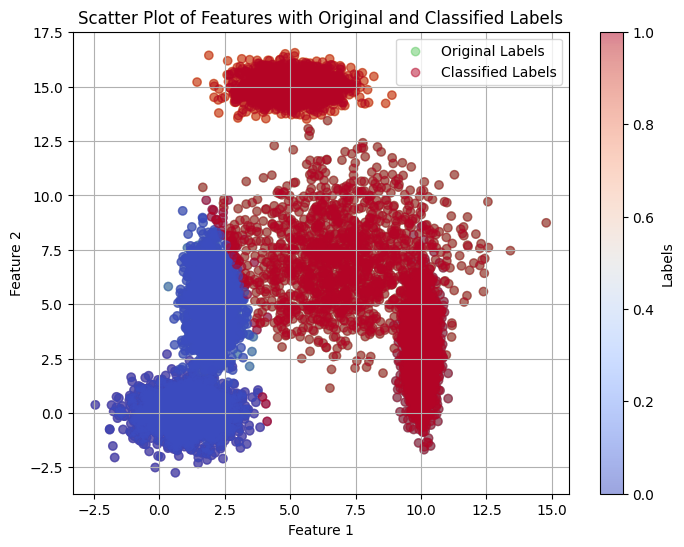

In [18]:

# Separate the features and labels
features = data_D2[['feature1', 'feature2']].values
original_labels = data_D2['labels'].values
classified_labels = data_D2['classified_labels'].values

# Create a scatter plot showing original and classified labels
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=original_labels, cmap='viridis', alpha=0.5, label='Original Labels')
plt.scatter(features[:, 0], features[:, 1], c=classified_labels, cmap='coolwarm', alpha=0.5, label='Classified Labels')
plt.colorbar(label='Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features with Original and Classified Labels')
plt.legend()
plt.grid(True)
plt.show()


# GMM

C:\Users\RPH\AppData\Local\Temp\ipykernel_17128\4035684523.py:10: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = plt.matplotlib.patches.Ellipse(mean, width, height, angle, color=color, alpha=0.3)


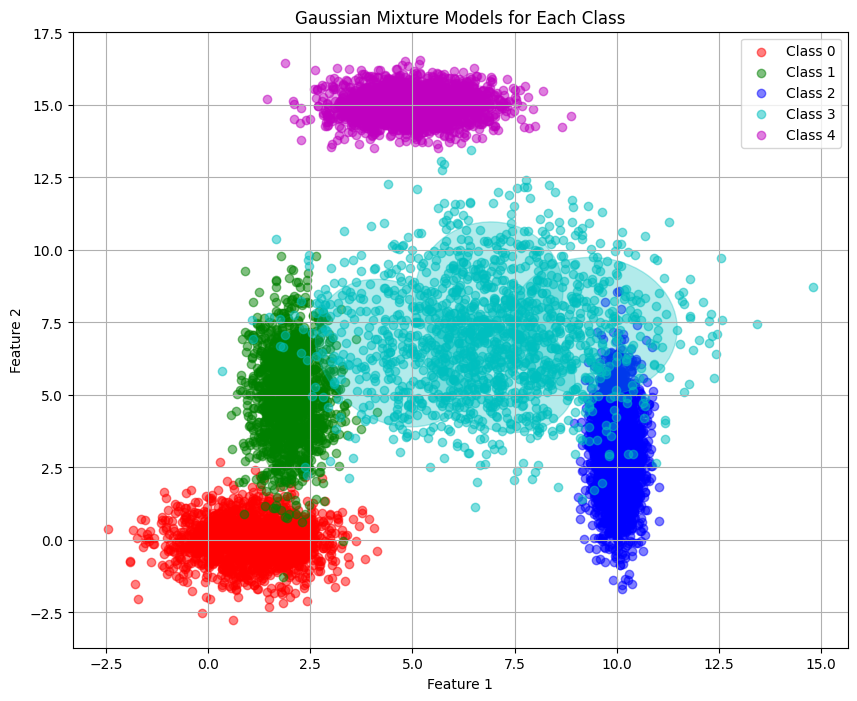

In [21]:

from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt



def plot_gaussian_ellipse(mean, covariance, color):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = plt.matplotlib.patches.Ellipse(mean, width, height, angle, color=color, alpha=0.3)
    plt.gca().add_patch(ellipse)




# Separate the features and labels
features = data_D2[['feature1', 'feature2']].values
labels = data_D2['labels'].values

# Define the number of components for each class 
num_components = {0: 1, 1: 1, 2: 2, 3: 1, 4: 2}

# Fit Gaussian Mixture Models for each class
gmm_models = {}
for label, num_comp in num_components.items():
    # Filter data for the current class
    class_features = features[labels == label]
    # Fit GMM
    gmm = GaussianMixture(n_components=num_comp, random_state=42)
    gmm.fit(class_features)
    gmm_models[label] = gmm

# Plot the Gaussian Mixture Models
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm']
for label, gmm in gmm_models.items():
    # Plot data points
    plt.scatter(features[labels == label][:, 0], features[labels == label][:, 1], color=colors[label], label=f'Class {label}', alpha=0.5)
    # Plot Gaussian components
    for i in range(gmm.n_components):
        plot_gaussian_ellipse(gmm.means_[i], gmm.covariances_[i], colors[label])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Models for Each Class')
plt.legend()
plt.grid(True)
plt.show()



# Iris datasets

In [19]:
iris_dataset = pd.read_csv('Iris.csv')

iris_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
iris_dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
print(iris_dataset.info)

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [22]:
print(iris_dataset.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [23]:
# To do: we should convert species to intiger because scikit-learn cant read string and all parameters should be intiger


d = {'Iris-setosa' : 0,
     'Iris-versicolor' : 1,
     'Iris-virginica' : 2,
}
df_new_iris = pd.read_csv('Iris.csv')
df_new_iris['Species'] = df_new_iris['Species'].map(d)
df_new_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [24]:
df_new_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [25]:
# Display the columns and their corresponding indices
for index, column_name in enumerate(df_new_iris.columns):
    print(f"Column '{column_name}' has index {index}")

Column 'Id' has index 0
Column 'SepalLengthCm' has index 1
Column 'SepalWidthCm' has index 2
Column 'PetalLengthCm' has index 3
Column 'PetalWidthCm' has index 4
Column 'Species' has index 5


In [26]:
y_new_iris = df_new_iris['Species'].values
y_new_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [27]:
# these are our features, also we can use their name but we use iloc(index location) method.

X_new_iris = df_new_iris.iloc[:, 1:5].values   #[:, 1:5]  means all row and 1 till 4 columns.
X_new_iris[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

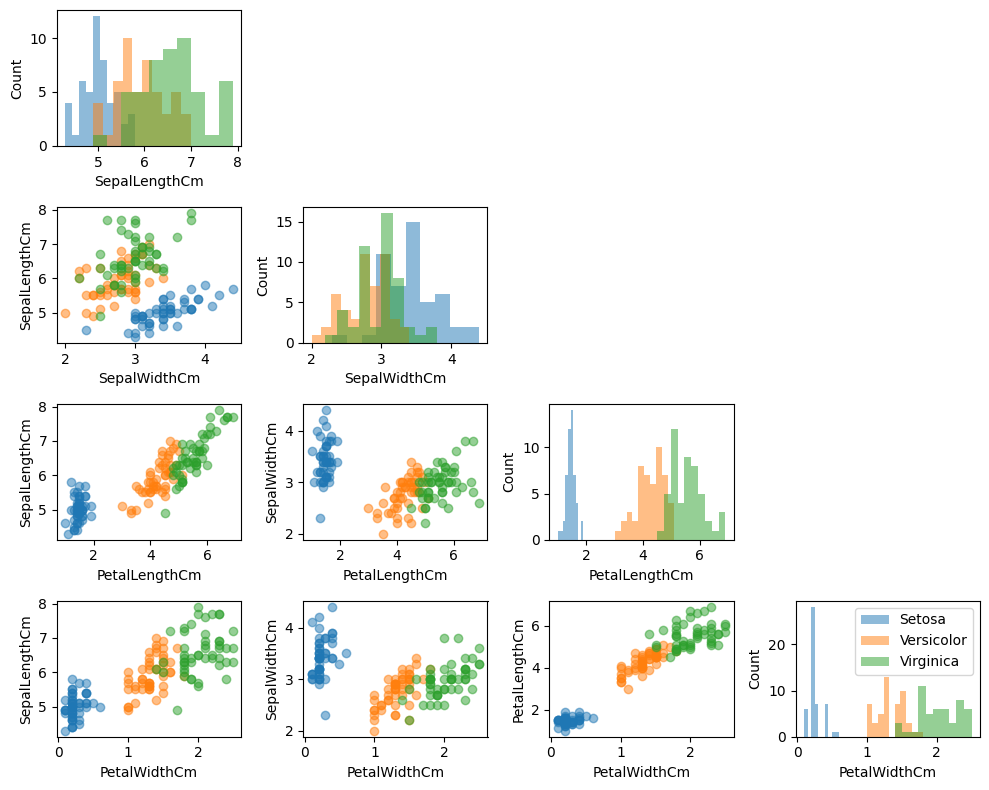

In [28]:
names = df_new_iris.columns[1:5] # this is for SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm

fig , axes = scatterplotmatrix(X_new_iris[y_new_iris==0], figsize=(10, 8), alpha=0.5) # plot for setosa
fig , axes = scatterplotmatrix(X_new_iris[y_new_iris==1], fig_axes=(fig, axes), alpha=0.5) # plot for Versicolor
fig , axes = scatterplotmatrix(X_new_iris[y_new_iris==2], fig_axes=(fig, axes), alpha=0.5, names=names) # plot for Virginica

plt.tight_layout()
plt.legend(labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()

### As you can see in the image above, data overlap in some areas, for example in petal length. To solve this problem, we need to use other features

# K_fold

In [29]:

from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB


# Define number of folds (k)
k = 5

# Initialize k-fold cross-validation
kf = KFold(n_splits=k)

# Initialize lists to store error variances
train_error_variances = []
test_error_variances = []

# Perform k-fold cross-validation
for train_index_new_iris, test_index_new_iris in kf.split(X_new_iris):
    X_train_new_iris, X_test_new_iris = X_new_iris[train_index_new_iris], X_new_iris[test_index_new_iris]
    y_train_new_iris, y_test_new_iris = y_new_iris[train_index_new_iris], y_new_iris[test_index_new_iris]

    # Fit Gaussian Naive Bayes model
    model = GaussianNB()
    model.fit(X_train_new_iris, y_train_new_iris)

    # Predictions
    y_train_pred_new_iris = model.predict(X_train_new_iris)
    y_test_pred_new_iris = model.predict(X_test_new_iris)

    # Error calculation for training and testing
    train_error_var = np.var(y_train_pred_new_iris != y_train_new_iris)
    test_error_var = np.var(y_test_pred_new_iris != y_test_new_iris)

    # Append to error lists
    train_error_variances.append(train_error_var)
    test_error_variances.append(test_error_var)

# Calculate average error variances
avg_train_error_variance = np.mean(train_error_variances)
avg_test_error_variance = np.mean(test_error_variances)

print("Average Training Error Variance:", avg_train_error_variance)
print("Average Testing Error Variance:", avg_test_error_variance)


Average Training Error Variance: 0.03681944444444444
Average Testing Error Variance: 0.049333333333333326


In [30]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# Initialize k-fold cross-validation
k = 5
k_fold = KFold(n_splits=k)

# Initialize lists to store results
train_mean_list = []
train_var_list = []
test_mean_list = []
test_var_list = []

# Perform k-fold cross-validation
for train_indices, test_indices in k_fold.split(X_new_iris):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_new_iris[train_indices], X_new_iris[test_indices]
    y_train_fold, y_val_fold = y_new_iris[train_indices], y_new_iris[test_indices]
    
    # Train Gaussian Naive Bayes classifier
    model = GaussianNB()
    model.fit(X_train_fold, y_train_fold)
    
    # Calculate mean and variance of training data
    train_mean = np.mean(model.predict(X_train_fold) == y_train_fold)
    train_var = np.var(model.predict(X_train_fold) == y_train_fold)
    train_mean_list.append(train_mean)
    train_var_list.append(train_var)
    
    # Calculate mean and variance of test data
    test_mean = np.mean(model.predict(X_val_fold) == y_val_fold)
    test_var = np.var(model.predict(X_val_fold) == y_val_fold)
    test_mean_list.append(test_mean)
    test_var_list.append(test_var)

# Calculate mean and variance of mean and error variance
train_mean_mean = np.mean(train_mean_list)
train_mean_var = np.var(train_mean_list)
train_var_mean = np.mean(train_var_list)
train_var_var = np.var(train_var_list)

test_mean_mean = np.mean(test_mean_list)
test_mean_var = np.var(test_mean_list)
test_var_mean = np.mean(test_var_list)
test_var_var = np.var(test_var_list)

print("Mean and Variance of Training Mean Accuracy:", train_mean_mean, train_mean_var)
print("Mean and Variance of Training Error Variance:", train_var_mean, train_var_var)
print("Mean and Variance of Test Mean Accuracy:", test_mean_mean, test_mean_var)
print("Mean and Variance of Test Error Variance:", test_var_mean, test_var_var)


Mean and Variance of Training Mean Accuracy: 0.9616666666666667 4.444444444444464e-05
Mean and Variance of Training Error Variance: 0.036819444444444446 3.743132716049397e-05
Mean and Variance of Test Mean Accuracy: 0.9466666666666667 0.0011555555555555549
Mean and Variance of Test Error Variance: 0.049333333333333326 0.0009425185185185179


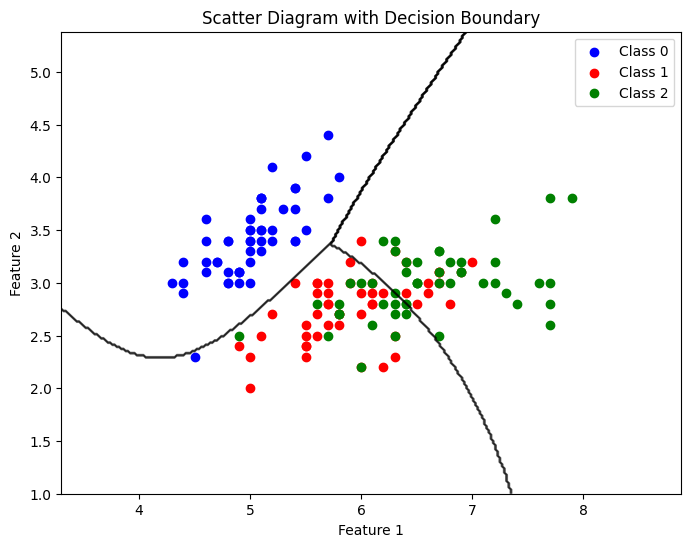

In [37]:


from sklearn.naive_bayes import GaussianNB

iris = df_new_iris
X_iris = X_new_iris
y_iris = y_new_iris

# For simplicity, let's use the first two features for plotting
X_iris = X_iris[:, :2]

# Train Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_iris, y_iris)

# Plot scatter diagram of the data
plt.figure(figsize=(8, 6))

# Scatter plot of class 0
plt.scatter(X_iris[y_iris == 0][:, 0], X_iris[y_iris == 0][:, 1], color='blue', label='Class 0')

# Scatter plot of class 1
plt.scatter(X_iris[y_iris == 1][:, 0], X_iris[y_iris == 1][:, 1], color='red', label='Class 1')

# Scatter plot of class 2
plt.scatter(X_iris[y_iris == 2][:, 0], X_iris[y_iris == 2][:, 1], color='green', label='Class 2')

# Define meshgrid for decision boundary
x_min, x_max = X_iris[:, 0].min() - 1, X_iris[:, 0].max() + 1
y_min, y_max = X_iris[:, 1].min() - 1, X_iris[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict labels for each point in meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.5)

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Diagram with Decision Boundary')
plt.legend()
plt.show()


# KNN

In [34]:
# we shuffle indices to divine data center training , validation and test

indices = np.arange(X_new_iris.shape[0])  # number of rows
rng = np.random.RandomState(123) # add 123 to creat same spilits
permuted_indices = rng.permutation(indices) # shuffle the rows numver 
permuted_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [35]:

train_size, valid_size = int(0.65*X_new_iris.shape[0]), int(0.15*X_new_iris.shape[0])
test_size = X_new_iris.shape[0] - (train_size + valid_size)
print(train_size, valid_size, test_size)

97 22 31


In [36]:
train_ind = permuted_indices[:train_size]
valid_ind = permuted_indices[train_size:(train_size + valid_size)]
test_ind = permuted_indices[(train_size + valid_size):]

In [37]:
x_train , y_train = X_new_iris[train_ind], y_new_iris[train_ind]
x_valid , y_valid = X_new_iris[valid_ind], y_new_iris[valid_ind]
x_test , y_test = X_new_iris[test_ind], y_new_iris[test_ind]

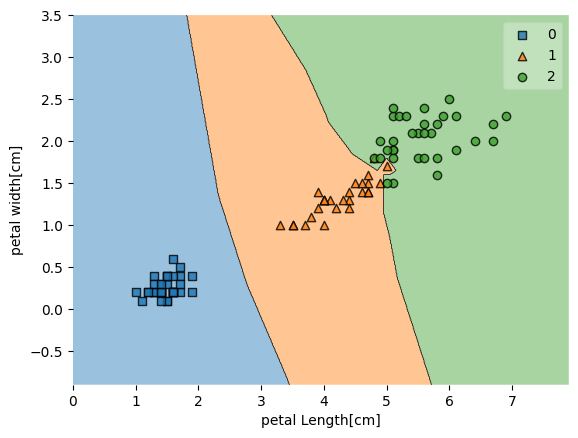

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

# K=1


knn_model = KNeighborsClassifier(n_neighbors=1) # initializing our hyperparameters and Parameters and Estimation
knn_model.fit(x_train[:, 2:], y_train) # use 2 features (third and fourth) petal length and petal width 
plot_decision_regions(x_train[:, 2:], y_train, knn_model)
plt.xlabel('petal Length[cm]')
plt.ylabel('petal width[cm]')
# plt.savefig('imagesldecisionreg.pdf')
plt.show()


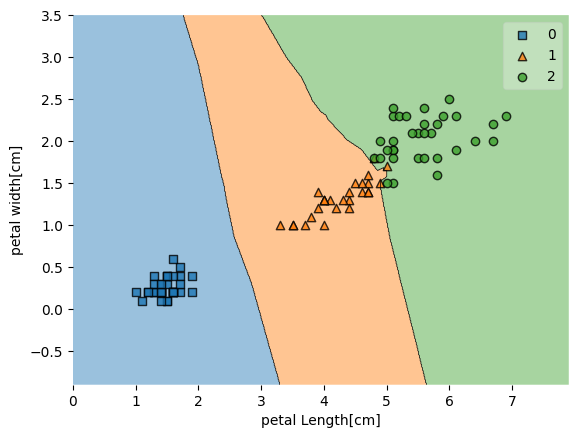

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

# K=3


knn_model = KNeighborsClassifier(n_neighbors=3) # initializing our hyperparameters and Parameters and Estimation
knn_model.fit(x_train[:, 2:], y_train) # use 2 features (third and fourth) petal length and petal width 
plot_decision_regions(x_train[:, 2:], y_train, knn_model)
plt.xlabel('petal Length[cm]')
plt.ylabel('petal width[cm]')
# plt.savefig('imagesldecisionreg.pdf')
plt.show()

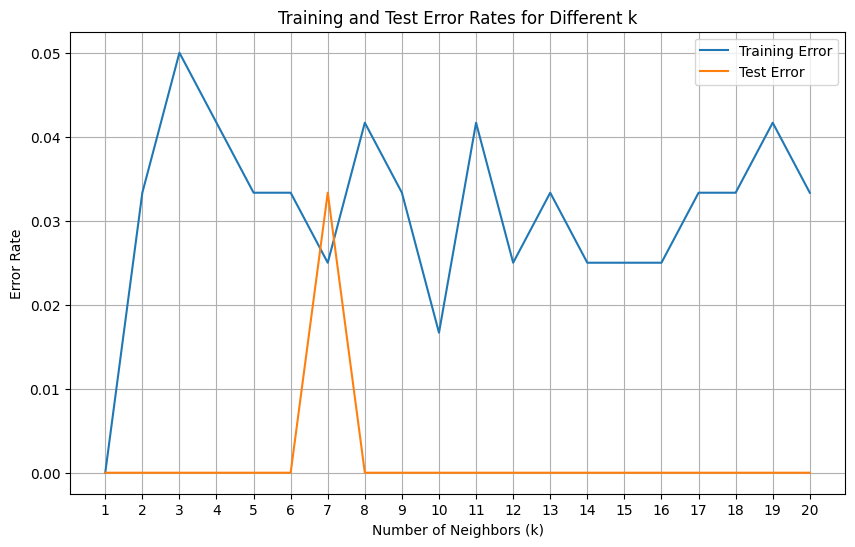

Optimal Number of Neighbors (k): 1
Test Error Rate with Optimal k: 0.0


In [42]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = df_new_iris
X_iris = X_new_iris
y_iris = y_new_iris

#  Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

#  Choose a range of k values
k_values = range(1, 21)  # Example: Evaluate k from 1 to 20

#  Train and evaluate the model for each k
train_errors = []
test_errors = []

for k in k_values:
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions on training and test sets
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    # Calculate errors
    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    
    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

#  Plot the error diagram
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error')
plt.plot(k_values, test_errors, label='Test Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Training and Test Error Rates for Different k')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

#  Determine the optimal k
optimal_k = k_values[np.argmin(test_errors)]
print("Optimal Number of Neighbors (k):", optimal_k)

#  Report the test error
test_error_optimal_k = test_errors[optimal_k - 1]  # Indexing starts from 0
print("Test Error Rate with Optimal k:", test_error_optimal_k)


### The blue squares correspond to the setosa class, the orange triangle is given to the versicolar and the green circles are given to virginica. 
### K = 1 is Optimum

# 